In [1]:
%cd ../..
%run cryptolytic/notebooks/init.ipynb

import pandas as pd
import cryptolytic.util.core as util
import cryptolytic.start as start
import cryptolytic.viz.plot as plot
import cryptolytic.data.sql as sql
import cryptolytic.data.historical as h
import cryptolytic.model as m
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from matplotlib.pylab import rcParams
from IPython.core.display import HTML
from pandas.plotting import register_matplotlib_converters # to stop a warning message


ohclv = ['open', 'high', 'close', 'low', 'volume']
plt.style.use('ggplot')
rcParams['figure.figsize'] = 20,7
start.init()
register_matplotlib_converters()


# Make math readable
HTML("""
<style>
.MathJax {
    font-size: 2rem;
}
</style>""")

/home/me/Documents/Git/Lambda-School-Labs/cryptolytic-ds
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [1]:
df = sql.get_some_candles(
    info={'start':1574368000, 'end':1579046400, 'exchange_id':'hitbtc',
          'trading_pair':'btc_usd', 'period':300}, n=5e4)
df2 = df.copy()  # mutable copy
train_test_pivot = int(len(df)*0.8)
df['diff'] = df['high'] - df['low']

NameError: name 'sql' is not defined

# Considerations for time series
- Understanding temporal behavior of data: seasonality, stationarity
- Identifying underlying distributions and nature of temporal process producing data
- Estimation of past, present, and future values
  - filtering vs forecasting
- Classification of time series (for example, arrhythmia in heart data)
- Anomaly detection of outlier points within time series

In [3]:
from scipy.stats import pearsonr
#a = m.get_by_time(df, '2019-11-22', '2019-11-26')
#b = m.get_by_time(df, '2019-11-26', '2019-11-28')

In [4]:
train = df
params = {
    'level' : 'smooth trend', 
    'cycle' : False,
    'seasonal' : None
}

In [5]:
import statsmodels as sm

util.bdir(sm.tsa)
util.bdir(sm.tsa.tsatools)
util.bdir(sm.tsa.stattools)

['ARMA',
 'Bunch',
 'CollinearityWarning',
 'InterpolationWarning',
 'LinAlgError',
 'MissingDataError',
 'OLS',
 'ResultsStore',
 'SQRTEPS',
 'acf',
 'acovf',
 'add_constant',
 'add_trend',
 'adfuller',
 'arma_order_select_ic',
 'bds',
 'ccf',
 'ccovf',
 'coint',
 'division',
 'grangercausalitytests',
 'has_missing',
 'innovations_algo',
 'innovations_filter',
 'iteritems',
 'kpss',
 'lagmat',
 'lagmat2ds',
 'levinson_durbin',
 'levinson_durbin_pacf',
 'long',
 'lrange',
 'lstsq',
 'lzip',
 'mackinnoncrit',
 'mackinnonp',
 'np',
 'pacf',
 'pacf_burg',
 'pacf_ols',
 'pacf_yw',
 'pd',
 'periodogram',
 'q_stat',
 'range',
 'stats',
 'string_types',
 'yule_walker',
 'zip']

In [6]:
# statsmodels.api
import statsmodels.api as sm 
import statsmodels as sm

In [7]:
candles_in_day = int(1440 / 5)
candles_in_day

288

# Hidden Markov Models (HMMs)
Type of state space model: Observations are an indicator of underlying state

Markov process: past doesn't matter if preset status is known

Parameter estimation: Baum-Welch Algorithm

Smootheing/state labeling: Viterbi algorithm

There is an unobservable state that is affecting the output, along with the input

$x_{t-1} -> x_{t} -> x_{t+1}$

$y_{t-1} -> y_{t} -> y_{t+1}$

# Baum-Welch Algorithm for Determining Parameters
- Expectation maximization parameter estimation:
- - Initialize parameters (with informative priors or randomly)
- - Em iterations
- - - Compute the expectation of the log likelihood given the data
- - Exit when desired convergence is reached
- - - Choose the parameters that maximize the log likelihood expectation
- Guarantee that the likelihood increases with each iteration (Forward-Backward Expectation Maximization Algorithm)
- - Figure out your likelihood expectation is given the data, that's the expectation step and the maximization step
-   is to update the estimates of your parameters to maximize that likelihood given that expression of that likelihood,
    and then repeat
- BUT
- - converges to a local maximum not a global maximum
- - can overfit the data

Problem
A : Transition Matrix probability, how likely x to transition to another state at that timestep. Gives a matrix, saying how likely for example to go from state i to state k, etc.
B : What is the probability of seeing a value at y, given a particular x.

$\theta = (A,B,\pi)$

Forward Step

$\pi$ : Priors, telling how likely you are to begin in a particular state

$\alpha_i(t) = P(Y_1 = y_1,...,Y_t = y_t, X_t = i |\theta) \\
\alpha_i(1) = \pi_ib_i(y_1)\\
\alpha_i(t+1) = b_i(y_{t+1})\sum_{j=1}^N\alpha_j(t)\alpha_{ji}
$

Backward Step
How probable is it, being conditionod on being in state i at time t, how probable is it to see the sequence from t+1 to T.


$
\beta_i(t) = P(Y_{t+1}=y_{t+1},...,Y_T=y_T|X_t=i,\theta)\\
\beta_i(T) = 1\\
\beta_i(t)=\sum_{j=1}^N\beta_j(t+1)a_{ij}b_j(y_{t+1}
$

Then there are $\gamma_i$ the probabliity of being in state i at time t given all the observed data and parameters $\theta$
$\gamma_i(t) = P(X_t=i|Y,\theta)=\frac{P(X_t=i|Y,\theta)}{P(Y|\theta)}=\frac{\alpha_i(t)\beta_i(t)}{\sum_{j=1}^N\alpha_j(t)\beta_j(t)}$

$\xi_{ij}(t)=P(X_t=i,X_{t+1}=j|Y,\theta)$ 

- Prior, how likely at the beginning of a sequennce to be at any given starting state
$$\pi_i^*=\gamma_i(1)$$

- How likely to transition from state i to state j at a particular timestep
$$\alpha_{ij}^*\frac{\sum_{t=1}^{T-1}\xi_ij(t)}{\sum_{t=1}^{T-1}\gamma_i(t)}$$

- How likely to see a observed value, given being in state i
$$b_i^*(v_k) = \frac{ \sum_{t=1}^T1_{y_t=v_k}\gamma_i(t) }{\sum_{t=1}^T\gamma_i(t)}$$

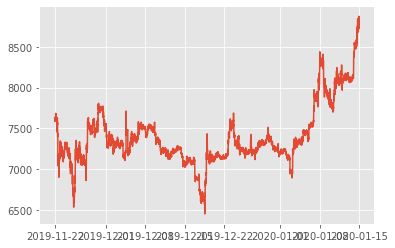

In [8]:
import matplotlib.pyplot as plt
plt.plot(df.index, df.close)

In [9]:
!pip -q  install hmmlearn
df_sub = df.iloc[:int(len(df)/4)]
from hmmlearn import hmm
# HMM Learn
vals = np.expand_dims(df_sub.close.values, 1) # requires two dimensions for the input
n_states = 2
model = hmm.GaussianHMM(n_components=n_states, n_iter=100, random_state=100).fit(vals)
hidden_states = model.predict(vals)

In [10]:
# Predicts two different states for the thing to be in. Kind of mirrors how 
hidden_states

array([1, 1, 1, ..., 0, 0, 0])

In [11]:
np.unique(hidden_states)

array([0, 1])

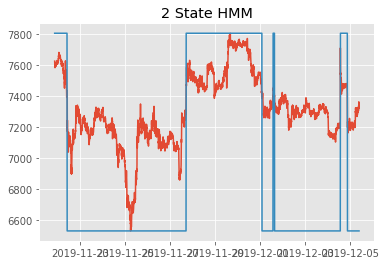

In [12]:
# There should be 2 distinct states, a Low flow state, high flow state
plt.plot(df_sub.index, df_sub.close)
_min = df_sub.close.min()
_max = df_sub.close.max()
h_min = hidden_states.min()
h_max = hidden_states.max()

plt.title('2 State HMM')
plt.plot(df_sub.index,[np.interp(x,[h_min,h_max], [_min,_max]) for x in hidden_states])

In [13]:
def fitHMM(vals, n_states):
    vals = np.reshape(vals, [len(vals), 1])
    
    # Fit Gaussian HMM to 0
    model = hmm.GaussianHMM(n_components=n_states, n_iter=100).fit(vals)
    
    # classify each observation as state 0 or 1
    hidden_states = model.predict(vals)
    
    # fit HMM parameters
    mus = np.squeeze(model.means_)
    sigmas = np.squeeze(np.sqrt(model.covars_))
    # Transition matrix which describes how likely you are to go from state i to state j
    transmat = np.array(model.transmat_)
    print(mus)
    print(sigmas)
    
    # reorder parameters in ascending order of mean of underlying distributions
    idx = np.argsort(mus)
    mus = mus[idx]
    sigmas = sigmas[idx]
    transmat = transmat[idx, :][:, idx]
    
    state_dict = {}
    states = [i for i in range(n_states)]
    for i in idx:
        state_dict[i] = states[idx[i]]
    
    relabeled_states = [state_dict[h] for h in hidden_states]
    return (relabeled_states, mus, sigmas, transmat, model)

In [14]:
hidden_states, mus, sigmas, transmat, model = fitHMM(df.close.values, 3)

[8048.85589562 7407.51028877 7127.95733329]
[259.1329164   93.17233082 146.81259604]


In [15]:
hidden_states

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [25]:
np.unique(hidden_states, return_counts=True)

(array([0, 1, 2]), array([7135, 5756, 2704]))

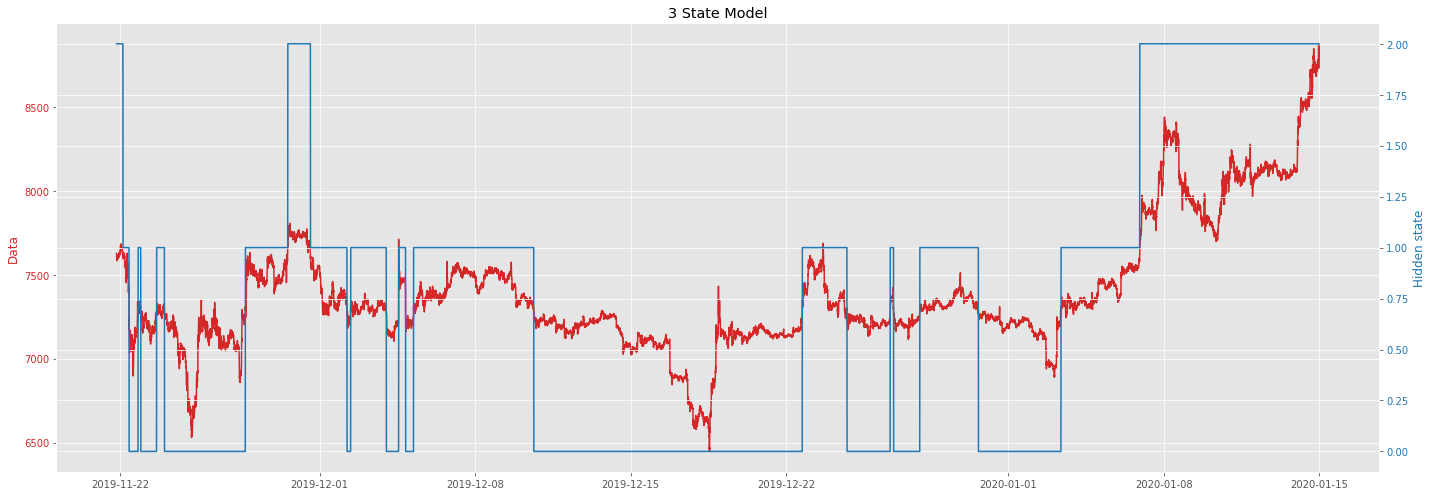

In [26]:
rcParams['figure.figsize'] = 20,7
def plot_states(ts_vals, states, time_vals):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_ylabel('Data',         color=color)
    ax1.plot(time_vals, ts_vals,      color=color)
    ax1.tick_params(axis='y',            labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Hidden state', color=color)  
    ax2.plot(time_vals,states,     color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title(f'{len(np.unique(states))} State Model')
    fig.tight_layout()  
    plt.show()
    
plot_states(df.close, hidden_states, df.index)

In [17]:
x = np.array([hidden_states]).T
m = np.array([mus])
print(np.shape(x), np.shape(m))
print(np.shape(m.T), np.shape(x.T))
z = np.matmul(x, m)

(15595, 1) (1, 3)
(3, 1) (1, 15595)


# Comparing the states

In [18]:
# The averages for the three states
mus

array([7127.95733329, 7407.51028877, 8048.85589562])

In [19]:
# In the high state, variance is highest, and it's lowest in the middle transitioning state. 
sigmas

array([146.81259604,  93.17233082, 259.1329164 ])

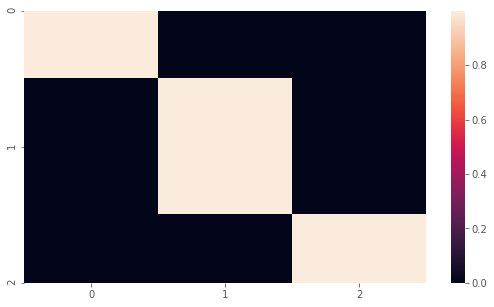

In [20]:
# Transmat gives teh probability of one state transition to another. 
# The values are very low because the number of data points is large.
rcParams['figure.figsize'] = 9, 5
import seaborn as sns
sns.heatmap(transmat)

In [21]:
# Can see from here though that the probability of transitioning 
# from the state 1 to state 3 and vice versa is low, they are more
# likely to transition to the in-between state instead. 
transmat

array([[9.98536349e-01, 1.46365113e-03, 3.78608896e-36],
       [1.83182474e-03, 9.97817448e-01, 3.50727313e-04],
       [9.63912522e-46, 7.40874949e-04, 9.99259125e-01]])

In [22]:
rcParams['figure.figsize'] = 20, 7

In [23]:
len(z[:, 0]), len(z[0])

(15595, 3)

# Time series feature generation
Time series features: catch22 canonical set
https://arxiv.org/pdf/1901.10200.pdf
xgboost 
Good at time series analysis
Clustering 

In [27]:
df

,open,close,high,low,timestamp,volume,period,diff
datetime,,,,,,,,
2019-11-21 20:30:00,7625.38,7626.31,7632.30,7623.67,1574368200,131.42956,300,8.63
2019-11-21 20:35:00,7625.64,7600.47,7625.64,7594.11,1574368500,84.75415,300,31.53
2019-11-21 20:40:00,7600.00,7598.88,7605.62,7583.80,1574368800,208.57723,300,21.82
2019-11-21 20:45:00,7599.79,7590.21,7600.64,7576.03,1574369100,92.76753,300,24.61
2019-11-21 20:50:00,7583.23,7584.00,7591.68,7579.35,1574369400,347.91620,300,12.33
2019-11-21 20:55:00,7585.37,7597.47,7597.47,7580.84,1574369700,5.42420,300,16.63
2019-11-21 21:00:00,7597.39,7613.72,7618.10,7596.81,1574370000,9.65457,300,21.29
2019-11-21 21:05:00,7615.11,7598.18,7617.69,7598.00,1574370300,12.04954,300,19.69
2019-11-21 21:10:00,7598.95,7592.12,7602.91,7589.81,1574370600,157.40622,300,13.10
